In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras import Model

2024-04-04 18:04:14.770822: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
df = pd.read_csv('./../ejerciciosModelosSupervisados/clasificacion_profesion/datos/train.csv')

In [3]:
# pre-process datos (si es necesario)

df= df.dropna(subset=['Work_Experience','Profession','Family_Size','Graduated_Yes'])

df['Profession'] = df['Profession'].replace({
    'Healthcare':0, 
    'Engineer':1, 
    'Lawyer':2, 
    'Entertainment':3, 
    'Artist':4,
    'Executive':5, 
    'Doctor':6, 
    'Homemaker':7, 
    'Marketing':8
})

df = pd.get_dummies(df)

In [4]:
yvar = df.Profession
xvars = df[[x for x in df.columns if x != 'Profession']]

In [5]:
# dividir train / test para variables independientes (x)  y dependiente (y)
xtrain, xtest, ytrain, ytest = train_test_split(xvars, yvar, train_size = 0.80, random_state = 2)

In [6]:
# convertir datos en numpy arrays

xtrain = np.array(xtrain)
xtest= np.array(xtest)
ytrain = np.array(ytrain).squeeze()
ytest = np.array(ytest).squeeze()

In [7]:
# arquitectura del modelo utilizando variables - FUNCTIONAL API

# input
model_input = Input(shape=(xtrain.shape[1],))
# primera capa
layer_1 = Dense(256, kernel_regularizer='l2', activation='relu')(model_input)
#segunda capa
layer_2 = Dense(256, kernel_regularizer='l2', activation='relu')(layer_1)
# predicción
model_output = Dense(9, activation = 'softmax')(layer_2)
# entrada y salida
model = Model(inputs=model_input, 
              outputs=model_output)

In [8]:
optimizer = tf.keras.optimizers.Adam(learning_rate = 0.0002)

model.compile(optimizer=optimizer, loss='SparseCategoricalCrossentropy', metrics = ['accuracy'])

In [9]:
history = model.fit(
    xtrain,
    ytrain,
    epochs=200,
    callbacks = [tf.keras.callbacks.EarlyStopping(monitor='val_loss',verbose=2, min_delta=0.001, patience=10),
                 tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', patience=5)],
    validation_data=(xtest, ytest)
)

Epoch 1/200
171/171 [==============================] - 1s 3ms/step - loss: 4.2227 - accuracy: 0.3781 - val_loss: 3.4611 - val_accuracy: 0.4242 - lr: 2.0000e-04
Epoch 2/200
171/171 [==============================] - 0s 2ms/step - loss: 3.0726 - accuracy: 0.4483 - val_loss: 2.7827 - val_accuracy: 0.4447 - lr: 2.0000e-04
Epoch 3/200
171/171 [==============================] - 1s 3ms/step - loss: 2.6285 - accuracy: 0.4637 - val_loss: 2.4836 - val_accuracy: 0.4645 - lr: 2.0000e-04
Epoch 4/200
171/171 [==============================] - 0s 3ms/step - loss: 2.4244 - accuracy: 0.4767 - val_loss: 2.3383 - val_accuracy: 0.4850 - lr: 2.0000e-04
Epoch 5/200
171/171 [==============================] - 1s 3ms/step - loss: 2.3038 - accuracy: 0.4894 - val_loss: 2.2668 - val_accuracy: 0.5011 - lr: 2.0000e-04
Epoch 6/200
171/171 [==============================] - 0s 3ms/step - loss: 2.2341 - accuracy: 0.4907 - val_loss: 2.2159 - val_accuracy: 0.5158 - lr: 2.0000e-04
Epoch 7/200
171/171 [===================

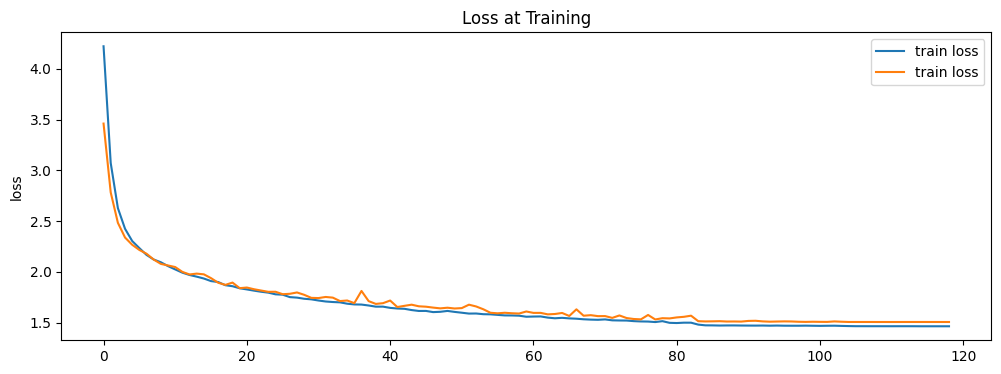

In [10]:
fig, ax = plt.subplots(figsize=(12,4))
ax.plot(range(len(history.history['loss'])), history.history['loss'], label='train loss')
ax.plot(range(len(history.history['val_loss'])), history.history['val_loss'], label='train loss')
ax.legend()
plt.ylabel("loss")
plt.title('Loss at Training')
plt.show()